In [180]:
#importing necessary libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')




In [198]:
#loading the dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [199]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# EDA

In [200]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [201]:
#checking information in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Here we can see that 8 columns are object which needs to be convert in Numeric 

In [202]:
df.nunique().sort_values(ascending=False)

Loan_ID              614
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Dependents             4
Property_Area          3
Gender                 2
Married                2
Education              2
Self_Employed          2
Credit_History         2
Loan_Status            2
dtype: int64

we can see here Loan Id column is having unique data for ID which will not help to predict the Data

hence we will remove that column.

# Checking Distinct Data in columns

1.0    475
0.0     89
Name: Credit_History, dtype: int64


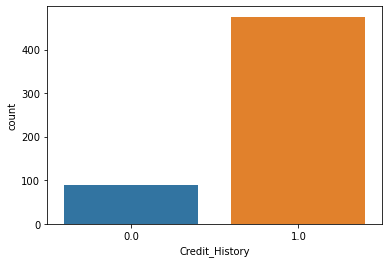

In [203]:
import seaborn as sns
ax=sns.countplot(x="Credit_History",data=df)
print(df["Credit_History"].value_counts())

Credit history 1 is having higher data compare to credit history 0

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


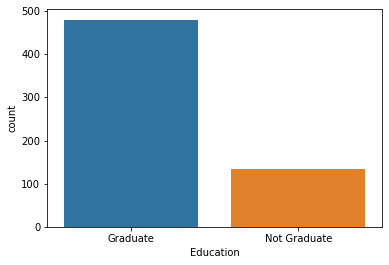

In [204]:
import seaborn as sns
ax=sns.countplot(x="Education",data=df)
print(df["Education"].value_counts())

For Loan we can see we have higher number of graduate people 

No     500
Yes     82
Name: Self_Employed, dtype: int64


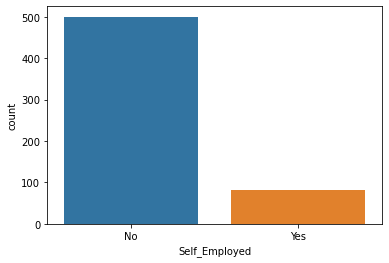

In [205]:
import seaborn as sns
ax=sns.countplot(x="Self_Employed",data=df)
print(df["Self_Employed"].value_counts())

on Self employed part we can see we have higher data for No and Less data for Yes

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


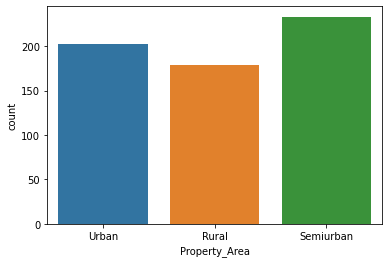

In [206]:
import seaborn as sns
ax=sns.countplot(x="Property_Area",data=df)
print(df["Property_Area"].value_counts())

Here we can see we have three Property area infomrstion on which Semirban is having high no of Data 

Male      489
Female    112
Name: Gender, dtype: int64


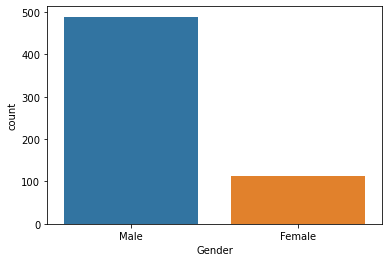

In [207]:
import seaborn as sns
ax=sns.countplot(x="Gender",data=df)
print(df["Gender"].value_counts())

On Gender Data we have highernumbers for Male compare to female

Yes    398
No     213
Name: Married, dtype: int64


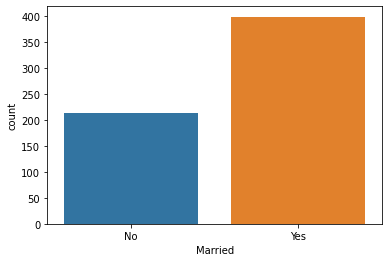

In [208]:
import seaborn as sns
ax=sns.countplot(x="Married",data=df)
print(df["Married"].value_counts())

Data suggested that Married people are higher for Loan compare to unmarried people

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


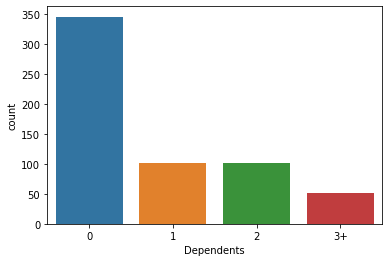

In [209]:
import seaborn as sns
ax=sns.countplot(x="Dependents",data=df)
print(df["Dependents"].value_counts())

On Dependents 0 is having highest Data among rest of 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


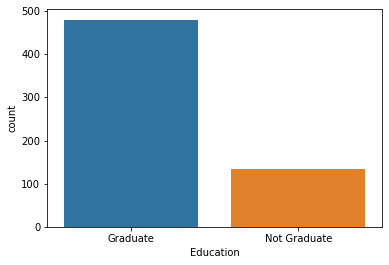

In [210]:
import seaborn as sns
ax=sns.countplot(x="Education",data=df)
print(df["Education"].value_counts())

Comparision of graduations and non graduation we can see loan applicatants are more from graduated backgraound

REst columns are Measures hence we will check the correlation with output columns

In [211]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# checking data discription

In [212]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observation:

    1.we can see the measures data are highly skewed hence possibilities to have outlier as well.
    2.Need to check with Null Data if its present then we will replace it with Mod or means values for object and numeric column
    3.Skwness should be removed using Power transform method if it present with checking by skew method.
    4.Outlier we will remove by using z - score method.
    5.After converting object col into numeric and if we can see multicolinearity is present then we will remove those columns as well as EDA part for better prediction

# checking null values 

In [213]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

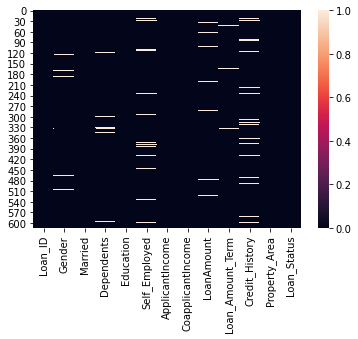

In [214]:
sns.heatmap(df.isnull())

we can see we have less number of Null values in columns which we should replaced with Mode and mean as for better prediction


# Impute technique to handle missing Data

In [215]:
df['Married']=df['Married'].fillna(df['Credit_History'].mode()[0])
df['Gender']=df['Gender'].fillna(df['Credit_History'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])


In [216]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

no null values is present now

<AxesSubplot:>

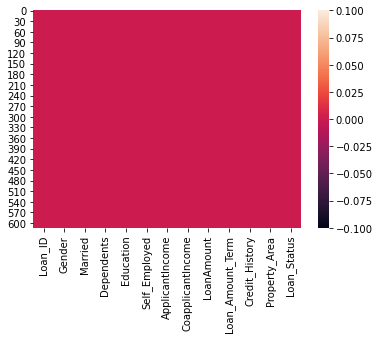

In [217]:
sns.heatmap(df.isnull())

# Dropping Column

In [218]:
df.drop(columns=['Loan_ID'],axis=1,inplace=True)

# checking Data for Output column

<AxesSubplot:>

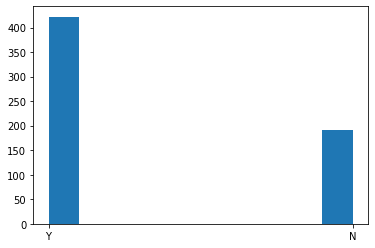

In [219]:
df['Loan_Status'].hist(grid=False)

In [220]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

so we can see our data is balanced 

Here we can see the Data is unbalnced hence we will use SMOTE technique to balance the data after we will split the data for training and testing

# Transformation Techniques to convert object data into numeric data

In [221]:
from sklearn.preprocessing import LabelEncoder

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [223]:
#by using for loop here we encoded the object columns
le =LabelEncoder()

list1=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [224]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2,1,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,2,2,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,2,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,2,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,2,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,2,2,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,2,2,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,2,2,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,2,2,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,2,2,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


In [226]:
df.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

HERE WE CAN SEE THE DATA IN NOW CONVERTED INTO NUMERIC FORMAT. HENCE IT WILL BE EASY FOR MODEL TO PREDICT THE DATA NOW

# checking correlation matrix

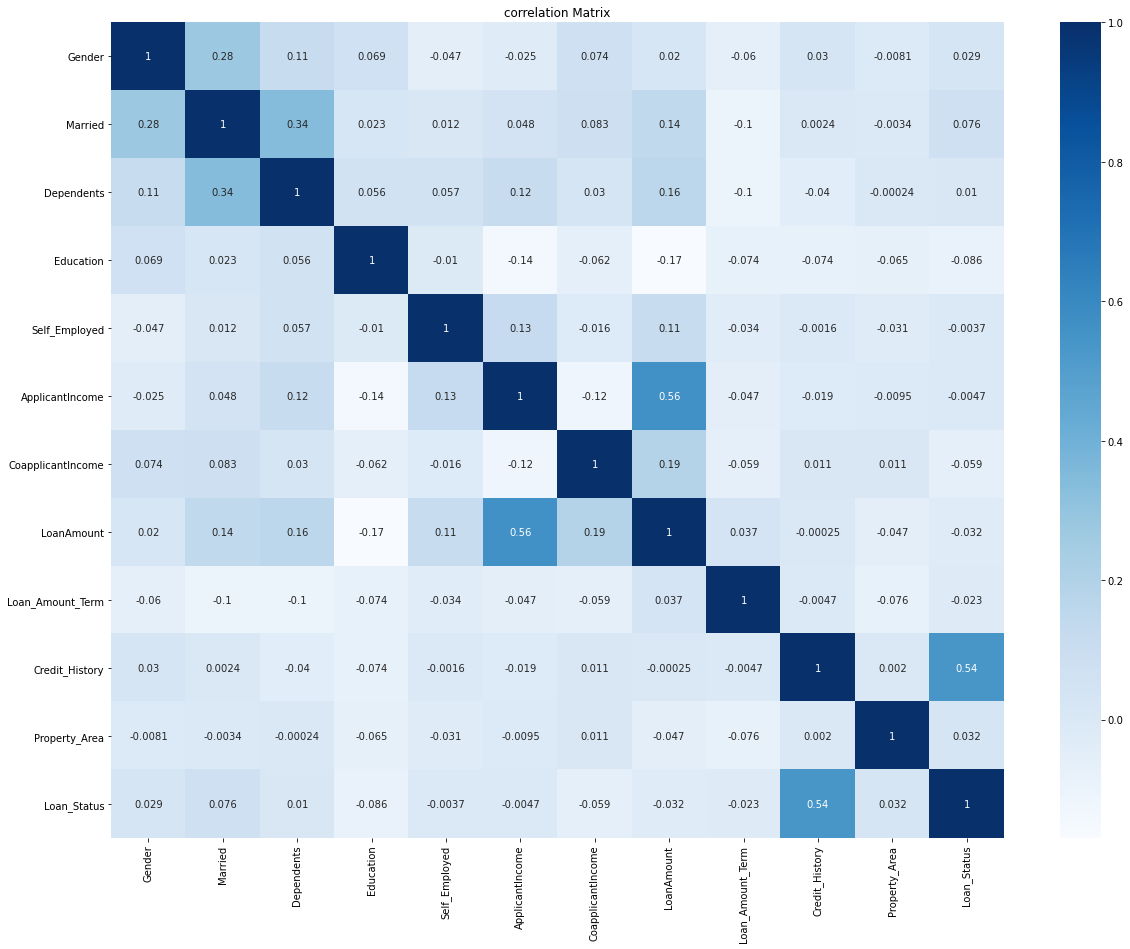

In [227]:
corr_mat=df.corr()

plt.figure(figsize=[20,15])
sns.heatmap(corr_mat,annot=True,cmap="Blues")
plt.title("correlation Matrix")
plt.show()

OBSERVATION:

Comparing Loan status output col with others for relation we can seee we have highest corelation with Credit_History and lowest with Eductaion but that is nearly zero we dont have much negatively corelationship with any column 

# Corelationship with Output Column

In [228]:
corr_mat['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.075547
Property_Area        0.032112
Gender               0.029040
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.031808
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

# Data Distribution with graph

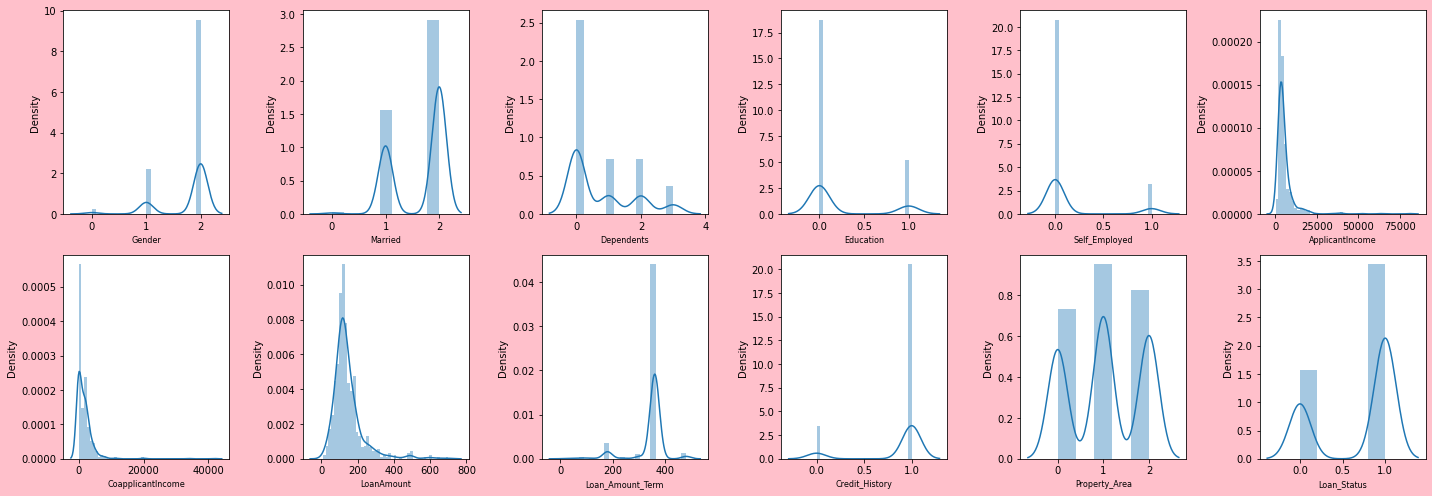

In [229]:
plt.figure(figsize=(20,7),facecolor='pink')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(2,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=8)
    
    
    plotnumber+=1
plt.tight_layout()

Here we can see many columns are not normalised. Skeness are present in almost all columns

# checking and removing Outliers

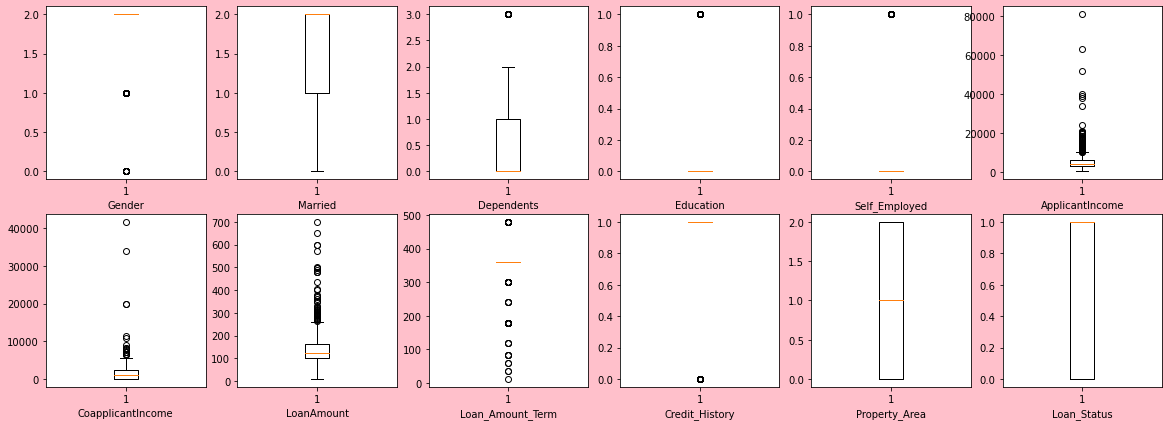

In [230]:
#checking one more time
plt.figure(figsize=(20,7),facecolor='pink')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(2,6,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.show()


Here we can see almost all columns are having outlier present except Property Area so we will ise Z score method to remove outliers

# Removing the outliers by zscore method

In [231]:
from scipy.stats import zscore

In [232]:
z=np.abs(zscore(df))
z

array([[0.48294277, 1.31528634, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.48294277, 0.72923471, 0.25346957, ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.48294277, 0.72923471, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.48294277, 0.72923471, 0.25346957, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.48294277, 0.72923471, 1.24474546, ..., 0.41173269, 1.22329839,
        0.67451931],
       [1.66580261, 1.31528634, 0.73780632, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [233]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  23,  68,  94, 104, 126, 126, 130, 133, 155, 155, 171,
       171, 171, 177, 177, 183, 185, 188, 228, 242, 262, 278, 308, 313,
       314, 333, 333, 334, 369, 402, 409, 417, 432, 435, 443, 460, 467,
       477, 487, 495, 497, 506, 507, 523, 525, 546, 561, 575, 576, 581,
       585, 588, 592, 600, 604], dtype=int64), array([6, 8, 0, 8, 8, 1, 0, 5, 7, 8, 5, 7, 0, 5, 7, 6, 7, 5, 5, 0, 1, 8,
       8, 7, 7, 8, 0, 5, 7, 0, 7, 6, 5, 6, 7, 1, 5, 0, 0, 0, 7, 8, 8, 7,
       0, 7, 7, 8, 7, 8, 0, 6, 8, 0, 0, 6, 7], dtype=int64))


In [234]:
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2,1,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,2,2,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,2,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,2,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,2,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,2,2,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,2,2,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,2,2,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


Again we will check Outliers

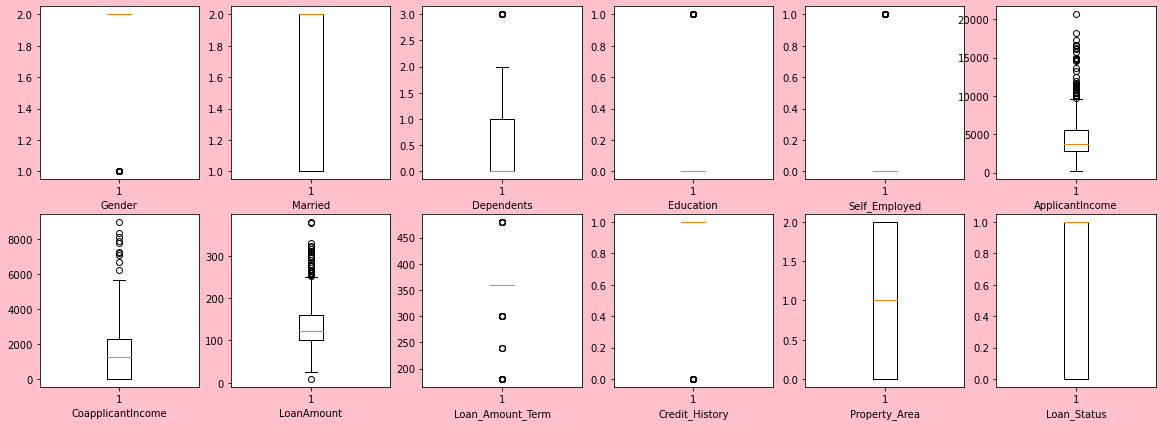

In [235]:
#checking one more time
plt.figure(figsize=(20,7),facecolor='pink')
plotnumber=1

for column in df_new:
    if plotnumber<=12:
        ax=plt.subplot(2,6,plotnumber)
        plt.boxplot(df_new[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.show()


Still we can see the outliers are present but we cant run z score method twice as suggested by shankar sir to avoid Data loss.

To cross verify we can use Percentile as well to see max diff in 90th and 100th percentile data diff in each column

In [236]:
df['ApplicantIncome'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0      150.0
0.1     2216.1
0.2     2605.4
0.3     3050.4
0.4     3406.8
0.5     3812.5
0.6     4343.6
0.7     5185.6
0.8     6252.4
0.9     9459.9
1.0    81000.0
Name: ApplicantIncome, dtype: float64

The income and CoapplicantIncome can be anything hence we will not take any action here

In [237]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [238]:
df['Loan_Amount_Term'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0     12.0
0.1    300.0
0.2    360.0
0.3    360.0
0.4    360.0
0.5    360.0
0.6    360.0
0.7    360.0
0.8    360.0
0.9    360.0
1.0    480.0
Name: Loan_Amount_Term, dtype: float64

we can see due to unique Data combination it showing as outliers. hence we can ignore this col as well

# Train Test Data

In [239]:
X=df_new.drop('Loan_Status',axis=1) # features
y=df_new.Loan_Status                 # label

# Checking skewness

In [240]:
X.skew().sort_values(ascending=False)

Self_Employed        2.308131
ApplicantIncome      2.173517
CoapplicantIncome    1.357268
Education            1.280520
LoanAmount           1.162165
Dependents           1.044532
Property_Area       -0.056994
Married             -0.614704
Gender              -1.599026
Credit_History      -1.994299
Loan_Amount_Term    -2.150526
dtype: float64

as all values are abovr +-0.5 we should use Power transform method to remove skwness

# Using Power_transform method to remove the skewness

In [241]:
from sklearn.preprocessing import power_transform

In [242]:
x_new=power_transform(X)

In [243]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

4     2.308131
3     1.280520
8     0.758301
2     0.468805
7     0.046921
5     0.028157
10   -0.156249
6    -0.191120
1    -0.614704
0    -1.599026
9    -1.994299
dtype: float64

In [244]:
pd.DataFrame(x_new,columns=X.columns).skew().sort_values(ascending=False)

Self_Employed        2.308131
Education            1.280520
Loan_Amount_Term     0.758301
Dependents           0.468805
LoanAmount           0.046921
ApplicantIncome      0.028157
Property_Area       -0.156249
CoapplicantIncome   -0.191120
Married             -0.614704
Gender              -1.599026
Credit_History      -1.994299
dtype: float64

In [245]:
x=pd.DataFrame(x_new,columns=X.columns)

In [246]:
x.skew().sort_values(ascending=False)

Self_Employed        2.308131
Education            1.280520
Loan_Amount_Term     0.758301
Dependents           0.468805
LoanAmount           0.046921
ApplicantIncome      0.028157
Property_Area       -0.156249
CoapplicantIncome   -0.191120
Married             -0.614704
Gender              -1.599026
Credit_History      -1.994299
dtype: float64

In [247]:
sk=x.skew()

In [248]:
sk[np.abs(sk)>0.5]

Gender             -1.599026
Married            -0.614704
Education           1.280520
Self_Employed       2.308131
Loan_Amount_Term    0.758301
Credit_History     -1.994299
dtype: float64

we have some columns where skewness hasnt been removed hence we will use BOX COX method to remove skewness seperately on positive target

<AxesSubplot:ylabel='Frequency'>

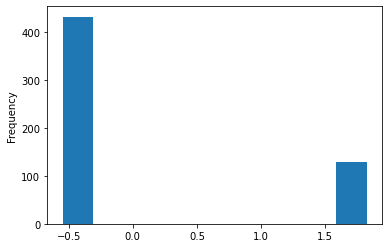

In [249]:
x['Education'].plot.hist()

In [ ]:
from scipy.stats import boxcox
x['Education']= boxcox(x['Education'],0)

Data is not positive hence we will ignore this column

<AxesSubplot:ylabel='Frequency'>

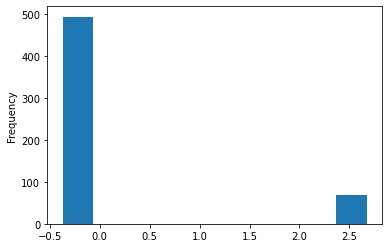

In [251]:
x['Self_Employed'].plot.hist()

In [ ]:
from scipy.stats import boxcox
x['Self_Employed']= boxcox(x['Self_Employed'],0)

Data is not positive hence we will ignore this column

<AxesSubplot:ylabel='Frequency'>

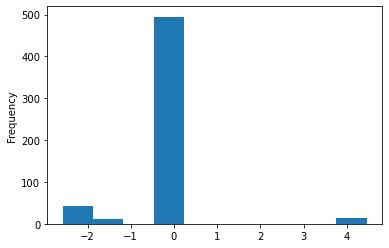

In [253]:
x['Loan_Amount_Term'].plot.hist()

In [ ]:
from scipy.stats import boxcox
x['Loan_Amount_Term']= boxcox(x['Loan_Amount_Term'],0)

Data must be positive.

<AxesSubplot:ylabel='Frequency'>

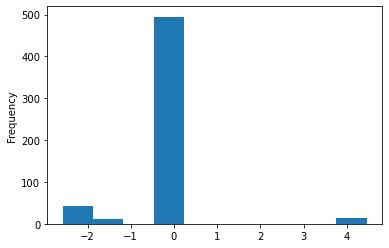

In [254]:
x['Loan_Amount_Term'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

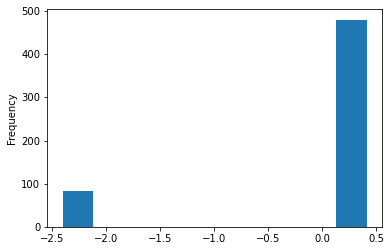

In [255]:
x['Credit_History'].plot.hist()

In [ ]:
from scipy.stats import boxcox
x['Credit_History']= boxcox(x['Credit_History'],0)

The Data is not positive hence we can ignore this column

In [256]:
x.skew().sort_values(ascending=False)

Self_Employed        2.308131
Education            1.280520
Loan_Amount_Term     0.758301
Dependents           0.468805
LoanAmount           0.046921
ApplicantIncome      0.028157
Property_Area       -0.156249
CoapplicantIncome   -0.191120
Married             -0.614704
Gender              -1.599026
Credit_History      -1.994299
dtype: float64

here we can see,from All column Skwness got removed except Self_Employed ,Education ,Loan_Amount_Term having skewness  

# SMOTE technique to balance the Data

In [111]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [113]:
x.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.481609,-1.352459,-0.813734,-0.547933,-0.373733,0.692951,-1.121969,-0.137492,0.132241,0.415832,1.189300
1,0.481609,0.739394,0.892675,-0.547933,-0.373733,0.240645,0.744526,0.016079,0.132241,0.415832,-1.336006
2,0.481609,0.739394,-0.813734,-0.547933,2.675709,-0.530879,-1.121969,-1.419120,0.132241,0.415832,1.189300
3,0.481609,0.739394,-0.813734,1.825040,-0.373733,-0.799113,0.896018,-0.137492,0.132241,0.415832,1.189300
4,0.481609,-1.352459,-0.813734,-0.547933,-0.373733,0.740566,-1.121969,0.252233,0.132241,0.415832,1.189300
5,0.481609,0.739394,1.339581,-0.547933,2.675709,0.550018,1.099189,2.006477,0.132241,0.415832,1.189300
6,0.481609,0.739394,-0.813734,1.825040,-0.373733,-0.980304,0.746289,-0.667699,0.132241,0.415832,1.189300
7,0.481609,0.739394,1.532417,-0.547933,-0.373733,-0.509405,0.916777,0.539600,0.132241,-2.404814,0.015498
8,0.481609,0.739394,1.339581,-0.547933,-0.373733,-0.006301,0.748480,0.698878,0.132241,0.415832,1.189300
9,0.481609,0.739394,1.339581,-0.547933,-0.373733,-0.414526,0.496368,-1.303610,0.132241,0.415832,1.189300


In [116]:
y.value_counts()

1    389
0    174
Name: Loan_Status, dtype: int64

In [118]:
trainx,trainy=smt.fit_resample(x,y)

In [121]:
trainy.value_counts()

0    389
1    389
Name: Loan_Status, dtype: int64

In [122]:
trainx.value_counts()

Gender     Married    Dependents  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area
-2.076372  -1.352459  -0.813734   -0.547933  -0.373733      -3.183124         1.052425          -0.277700    4.463530          0.415832       -1.336006        1
 0.481609   0.739394   0.892675   -0.547933  -0.373733      -0.140495         0.969492           0.421374    0.132241          0.415832        0.006927        1
                       0.800356   -0.547933  -0.373733       0.838838         1.269720           0.869244    0.132241         -2.404814        1.189300        1
                       0.814721   -0.547933  -0.373733      -0.642112         0.827037           0.316429    0.132241         -2.404814       -1.336006        1
                       0.892675   -0.547933  -0.373733      -1.711457         0.725712          -2.771025    0.132241          0.415832        1.189300        1
                                       

In [123]:
x=trainx

In [124]:
y=trainy

In [125]:
y.value_counts()

0    389
1    389
Name: Loan_Status, dtype: int64

# Model Prediction: for two Output 
Hence here we can apply Logistic regression, random forest,SVC,Knn model 

# Using  RandomForest Classifier 

In [128]:
#To get best Test size number from 1 to 40%
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8333333333333334 Random state 0.1
accuracy 0.851063829787234 Random state 0.12
accuracy 0.8532110091743119 Random state 0.14
accuracy 0.8865248226950354 Random state 0.18
Best accuracy is 88.65248226950354 on Random state 0.18


In [129]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(1,500):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.18,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8581560283687943 Random state 1
accuracy 0.8794326241134752 Random state 7
accuracy 0.8936170212765957 Random state 13
accuracy 0.900709219858156 Random state 25
accuracy 0.9078014184397163 Random state 39
accuracy 0.9148936170212766 Random state 451
Best accuracy is 91.48936170212765 on Random state 451


In [130]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.18,random_state=451) 
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=rf.score(x_test,y_test)

print('Accuracy Score',rf,'is:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score RandomForestClassifier() is:
0.9148936170212766
[[65  8]
 [ 4 64]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        73
           1       0.89      0.94      0.91        68

    accuracy                           0.91       141
   macro avg       0.92      0.92      0.91       141
weighted avg       0.92      0.91      0.91       141



Random forest is giving 91.48% accuracy

# Logistic Regression model 

In [135]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7307692307692307 Random state 0.1
accuracy 0.7441860465116279 Random state 0.11
accuracy 0.7553191489361702 Random state 0.12
accuracy 0.7692307692307693 Random state 0.15
Best accuracy is 76.92307692307693 on Random state 0.15


In [136]:
#finding the best random state
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.15,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7264957264957265 Random state 1
accuracy 0.7777777777777778 Random state 7
accuracy 0.7948717948717948 Random state 8
accuracy 0.811965811965812 Random state 59
Best accuracy is 81.19658119658119 on Random state 59


In [137]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.15,random_state=59)
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=lr.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
#print(classification_report(y_test,predrf)*100)

Accuracy 81.19658119658119
[[3400 1300]
 [ 900 6100]]


logistic regression is giving 81.19% accuracy

# Support vector classifier

In [138]:
#finding the best test_SIZE
from sklearn.svm import SVC
sv=SVC()


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1)
    sv.fit(x_train,y_train)
    pred=sv.predict(x_test)
    acc=sv.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7435897435897436 Random state 0.1
accuracy 0.7450980392156863 Random state 0.13
accuracy 0.7522935779816514 Random state 0.14
accuracy 0.7777777777777778 Random state 0.15
accuracy 0.7985347985347986 Random state 0.35000000000000003
Best accuracy is 79.85347985347985 on Random state 0.35000000000000003


In [140]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.11,random_state=i)
    sv.fit(x_train,y_train)
    pred=sv.predict(x_test)
    acc=sv.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8023255813953488 Random state 1
accuracy 0.8372093023255814 Random state 2
accuracy 0.872093023255814 Random state 59
Best accuracy is 87.20930232558139 on Random state 59


In [142]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.11,random_state=59)
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
acc=sv.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
print(classification_report(y_test,pred)*100)

Accuracy 87.20930232558139
[[2500  400]
 [ 700 5000]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.93      0.88      0.90        57

    accuracy                           0.87        86
   macro avg       0.85      0.87      0.86        86
weighted avg       0.88      0.87      0.87        86
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.93      0.88      0.90        57

    accuracy                           0.87        86
   macro avg       0.85      0.87      0.86        86
weighted avg       0.88      0.87      0.87        86
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.93      0.88      0.90        57

    accuracy                           0.87        86
   macro avg       0.85      0.87      0.86        86
weighted avg       0.8

svc is giving 87.20% accuracy

# KNeighborsClassifier Model

In [143]:
#finding the best test_size
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    acc=knc.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8076923076923077 Random state 0.1
Best accuracy is 80.76923076923077 on Random state 0.1


In [145]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.10,random_state=i)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    acc=knc.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8205128205128205 Random state 1
accuracy 0.8589743589743589 Random state 8
Best accuracy is 85.8974358974359 on Random state 8


In [146]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.10,random_state=8)
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
acc=knc.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
print(classification_report(y_test,pred)*100)

Accuracy 85.8974358974359
[[3700  600]
 [ 500 3000]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        43
           1       0.83      0.86      0.85        35

    accuracy                           0.86        78
   macro avg       0.86      0.86      0.86        78
weighted avg       0.86      0.86      0.86        78
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        43
           1       0.83      0.86      0.85        35

    accuracy                           0.86        78
   macro avg       0.86      0.86      0.86        78
weighted avg       0.86      0.86      0.86        78
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        43
           1       0.83      0.86      0.85        35

    accuracy                           0.86        78
   macro avg       0.86      0.86      0.86        78
weighted avg       0.86

knc is giving 85.89% accuracy

# GaussianNB model

In [147]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()

In [148]:
#finding the best test_size
maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1)
    gn.fit(x_train,y_train)
    pred=gn.predict(x_test)
    acc=gn.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)


accuracy 0.717948717948718 Random state 0.1
accuracy 0.7558139534883721 Random state 0.11
Best accuracy is 75.5813953488372 on Random state 0.11


In [150]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.11,random_state=i)
    gn.fit(x_train,y_train)
    pred=gn.predict(x_test)
    acc=gn.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7790697674418605 Random state 1
accuracy 0.813953488372093 Random state 8
accuracy 0.8837209302325582 Random state 59
Best accuracy is 88.37209302325581 on Random state 59


In [151]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.11,random_state=59)
gn.fit(x_train,y_train)
pred=gn.predict(x_test)
acc=gn.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
print(classification_report(y_test,pred)*100)

Accuracy 88.37209302325581
[[1900 1000]
 [   0 5700]]
              precision    recall  f1-score   support

           0       1.00      0.66      0.79        29
           1       0.85      1.00      0.92        57

    accuracy                           0.88        86
   macro avg       0.93      0.83      0.86        86
weighted avg       0.90      0.88      0.88        86
              precision    recall  f1-score   support

           0       1.00      0.66      0.79        29
           1       0.85      1.00      0.92        57

    accuracy                           0.88        86
   macro avg       0.93      0.83      0.86        86
weighted avg       0.90      0.88      0.88        86
              precision    recall  f1-score   support

           0       1.00      0.66      0.79        29
           1       0.85      1.00      0.92        57

    accuracy                           0.88        86
   macro avg       0.93      0.83      0.86        86
weighted avg       0.9

GaussianNB is giving 88.37% accuracy

# Desicion Tree classifier model

In [152]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [153]:
#finding the best test_size
maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1)
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)


accuracy 0.8333333333333334 Random state 0.1
accuracy 0.8525641025641025 Random state 0.2
Best accuracy is 85.25641025641025 on Random state 0.2


In [154]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.20,random_state=i)
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7564102564102564 Random state 1
accuracy 0.782051282051282 Random state 2
accuracy 0.7948717948717948 Random state 6
accuracy 0.8461538461538461 Random state 13
Best accuracy is 84.61538461538461 on Random state 13


In [155]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.20,random_state=13)
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
acc=dt.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
print(classification_report(y_test,pred)*100)

Accuracy 83.97435897435898
[[7000 1200]
 [1300 6100]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        82
           1       0.84      0.82      0.83        74

    accuracy                           0.84       156
   macro avg       0.84      0.84      0.84       156
weighted avg       0.84      0.84      0.84       156
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        82
           1       0.84      0.82      0.83        74

    accuracy                           0.84       156
   macro avg       0.84      0.84      0.84       156
weighted avg       0.84      0.84      0.84       156
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        82
           1       0.84      0.82      0.83        74

    accuracy                           0.84       156
   macro avg       0.84      0.84      0.84       156
weighted avg       0.8

Desicion tree clasifier is giving 83.97% accuracy

# Cross Validatiion

In [157]:
from sklearn.model_selection import cross_val_score

In [158]:
#linear regression
scr=cross_val_score(lr,x,y)
print('cross validation score',scr.mean())

cross validation score 0.7056162117452439


In [159]:
#desiciontree classifier
scr=cross_val_score(dt,x,y)
print('cross validation score',scr.mean())

cross validation score 0.7829114971050455


In [160]:
#random forest classifier
scr=cross_val_score(rf,x,y)
print('cross validation score',scr.mean())

cross validation score 0.8394706368899918


In [161]:
#SVC
scr=cross_val_score(sv,x,y)
print('cross validation score',scr.mean())

cross validation score 0.7210587262200165


In [162]:
#KNC 
scr=cross_val_score(knc,x,y)
print('cross validation score',scr.mean())

cross validation score 0.7493631100082714


In [163]:
scr=cross_val_score(gn,x,y)
print('cross validation score',scr.mean())

cross validation score 0.7069313482216708


Here we can see Random forest algorithm is givin highest accuracy hence we will check hyper parameter for same model to get best parameter combination 

# Using Hyperparameter tunning

In [167]:
from sklearn.model_selection import GridSearchCV

In [171]:
from sklearn.model_selection import GridSearchCV
rf1= RandomForestClassifier()

params={'max_features':['auto','sqrt','log2'],
       'max_depth':[10,15],
       'criterion':['gini','entropy']
       }
for j in range(2,6):
    grd=GridSearchCV(rf1,param_grid=params,cv=j,scoring='accuracy')

    grd.fit(x_train,y_train)

    print('best_params:',grd.best_params_)

    rf1=grd.best_estimator_

    rf1.fit(x_train,y_train)

    y_pred=rf1.predict(x_test)

    rf_conf_mat=confusion_matrix(y_test,y_pred)

    print(rf_conf_mat)

    print(accuracy_score(y_test,y_pred))
    
    print('CV:',j)


best_params: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt'}
[[70 12]
 [ 5 69]]
0.8910256410256411
CV: 2
best_params: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt'}
[[66 16]
 [ 3 71]]
0.8782051282051282
CV: 3
best_params: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto'}
[[61 21]
 [ 3 71]]
0.8461538461538461
CV: 4
best_params: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto'}
[[69 13]
 [ 4 70]]
0.8910256410256411
CV: 5


In [179]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.18,random_state=451) 
rf_final=RandomForestClassifier(criterion= 'gini', max_depth= 15, max_features= 'auto')
rf_final.fit(x_train,y_train)
pred=rf_final.predict(x_test)
acc=rf_final.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
print(classification_report(y_test,pred)*100)

Accuracy 90.0709219858156
[[6500  800]
 [ 600 6200]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        73
           1       0.89      0.91      0.90        68

    accuracy                           0.90       141
   macro avg       0.90      0.90      0.90       141
weighted avg       0.90      0.90      0.90       141
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        73
           1       0.89      0.91      0.90        68

    accuracy                           0.90       141
   macro avg       0.90      0.90      0.90       141
weighted avg       0.90      0.90      0.90       141
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        73
           1       0.89      0.91      0.90        68

    accuracy                           0.90       141
   macro avg       0.90      0.90      0.90       141
weighted avg       0.90

# by using hyper parameter tunning accurac is 90.07 %

# plot the ROC corve

In [183]:
y_pred=sv.predict(x_test)

In [184]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
tpr,fpr,thresholds=roc_curve(y_test,y_pred)

In [185]:
fpr,tpr,thresholds

(array([0.        , 0.97058824, 1.        ]),
 array([0.        , 0.28767123, 1.        ]),
 array([2, 1, 0]))

In [186]:
print("threshold",thresholds)
print("False positive rate",fpr)
print('True positive rate',tpr)

threshold [2 1 0]
False positive rate [0.         0.97058824 1.        ]
True positive rate [0.         0.28767123 1.        ]


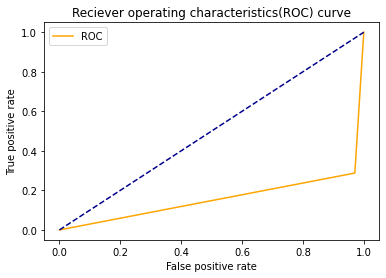

In [187]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operating characteristics(ROC) curve')
plt.legend()
plt.show()

# AUC score

In [188]:
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score*100)

84.14585012087026


# Classification Report

In [189]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.71      0.82        73
           1       0.76      0.97      0.85        68

    accuracy                           0.84       141
   macro avg       0.86      0.84      0.84       141
weighted avg       0.86      0.84      0.83       141



# saving the model in pickel format

In [190]:
import joblib
joblib.dump(accuracy_score(y_test, pred)*100,"loan.pk1")

['loan.pk1']

# Testing Model with Future Data for output

In [191]:
x.iloc[0]

Gender               0.481609
Married             -1.352459
Dependents          -0.813734
Education           -0.547933
Self_Employed       -0.373733
ApplicantIncome      0.692951
CoapplicantIncome   -1.121969
LoanAmount          -0.137492
Loan_Amount_Term     0.132241
Credit_History       0.415832
Property_Area        1.189300
Name: 0, dtype: float64

In [192]:
y.iloc[0]

1

we will take exist data as sample data to compare predict output

In [193]:
t=np.array([0.481609,-1.352459,-0.813734,-0.547933,-0.373733,0.692951,-1.121969,-0.137492,0.132241,0.415832,1.189300])

In [194]:
t.shape

(11,)

In [195]:
x_train.shape

(637, 11)

In [196]:
t=t.reshape(1,-1)
t.shape

(1, 11)

In [197]:
rf_final.predict(t)

array([1])

The predicted Output for Loan_status is matching with Actual otput i.e. 1